In [550]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os
import os.path as path
import wget

In [244]:
A = np.array([[1,0,0],[5,1,0],[-2,3,1]])
B = np.array([[4,-2,1],[0,3,7],[0,0,2]])


#3,4,7,9

#3
def GetMultiplication(A,B):
    matrix_column = []
    for i in range(len(B)):
        column = []
        for j in range(len(B)): 
            column.append(B[j][i])
        matrix_column.append(column)
    

    multiplication_matrix =[]
    for k in A:
        new_matrix = []
        for w in matrix_column:
            new_matrix.append(np.dot(k,w))
        multiplication_matrix.append(new_matrix)
        
    return np.array(multiplication_matrix)

print("El resultado de la multiplicación entre las matrices dadas es:\n {}".format(GetMultiplication(A,B)))

El resultado de la multiplicación entre las matrices dadas es:
 [[ 4 -2  1]
 [20 -7 12]
 [-8 13 21]]


**4)Teorico**

Este método de sustitución hacia delante se usa especialmente para solucionar sistemas de la forma $Lx = b$ donde es posible L es la matriz triangular inferior que sale al factorizar una matriz A. Así, sea el sistema de solución de matrices dado por,

$$ \begin{bmatrix}
l_{11} & 0 & 0  \\
l_{21} & l_{22} & 0  \\
l_{31} & l_{32} & l_{33}  \\

\end{bmatrix} 
\begin{bmatrix}
x_1  \\
x_2  \\
x_3 
\end{bmatrix} 
= 
\begin{bmatrix}
b_1  \\
b_2  \\
b_3 
\end{bmatrix} 
$$

La solución para la primera variable sería de la forma,

$$ L_{11} x_1 = b_1 \rightarrow x_1 = \frac{b_1}{L_{11}} $$

La solución para la segunda variable sería de la forma,

$$ L_{21} x_1 + L_{22} x_2 = b_2 $$

Sustituyendo $x_1$ y despejando la para $x_2$ obtenemos que,

$$ x_2 = \frac{b_2 - L_{21} (b_1/L_{11})}{L_{22}} $$

Para la solución de la tercera variable obtenemos que,
$$ L_{33}  x_3 + L_{31} x_1 + L_{32}  x_2 = b_3 $$

Como podemos observar la i-ésima solución dependerá de las soluciones anteriores, por lo que la sumatoria se puede escribir de la forma, 

$$ b_i =  \sum_{j=1}^{i} A_{ij}  x_j $$

Sin embargo, si queremos despejar la variable i-ésima, debemos de cambiar los índices de la sumatoria y extraer el término de que deseamos,

$$ b_i =  L_{ii} x_i + \sum_{j=0}^{i-1} A_{ij}  x_j \rightarrow L_{ii}x_i = b_i - \sum_{j=0}^{i-1} A_{ij}  x_j$$

En este caso, la matriz factorizada L tiene la particularidad que su diagonal está compuesta solo por números uno. Por lo que nuestra ecuacion queda reducida a,

$$ x_i = b_i -  \sum_{j=0}^{i-1} A_{ij}  x_j $$

Y así queda mostrada la ecuación del enunciado para el método de sustitución hacia atrás.

In [557]:
#7
def FactorizationLU(m):
    A = np.array(m)
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    
    for j in range(n):
        L[j][j] = 1.0
        
        for i in range(j+1,n):
            L[i][j] = A[i][j] / A[j][j]
            
            for k in range(j+1,n):
                A[i][k] = A[i][k] - L[i][j]*A[j][k]
                
        for k in range(j,n):
            U[j][k] = A[j][k]
    
    return L,U

M = np.array([[4,-2,1],[20,-7,12],[-8,13,17]])
L,U = FactorizationLU(M)

print("Dada la matriz  A su respectiva factorización es: \n L: \n {} \n U: \n {}".format(L,U))

Dada la matriz  A su respectiva factorización es: 
 L: 
 [[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]] 
 U: 
 [[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [558]:
#9 usando funciones raras de numpy y arctan2

def GetJacobiEig(A, it=1000):
    #Definir dimension y matrices necesarias.
    n = A.shape[0]
    #Matriz para los valores propios.
    D = A.copy()
    #Matriz para los vectores propios.
    B = -np.eye(n)
     
    #Encontrar los índices del máximo elemento no diagonal. 
    for k in range(it):
        max_index = (0, 0)
        max_value = 0
        for i in range(n):
            for j in range(i+1, n):
                value = np.abs(D[i][j])
                if value > max_value:
                    max_value = value
                    max_index = (i,j)
        
        #Indice de la fila.          
        i = max_index[0]
        #Indice de la columna.
        j = max_index[1]

        #Se calcula el ángulo de rotación teniendo en cuenta los signos del cuadrante.
        if D[i][i] == D[j][j]:
            theta = np.pi / 4
        else:
            t = (2 * D[i][j]) / (D[j][j] - D[i][i]) 
            if t >= 0:
                theta = 0.5 * np.tan(t)
            else:
                theta = 0.5 * np.tan(t) + np.pi
        
        #Se asignan los valores para la matriz de rotación.
        R = np.eye(n)
        R[i][i] = np.cos(theta)
        R[j][j] = np.cos(theta)
        R[i][j] = np.sin(theta)
        R[j][i] = -np.sin(theta)

        #Se actualizan las matrices D y B
        #Para los valores propios será el producto punto entre la transpuesta de R, y el producto punto de D y R.
        D = np.dot(R.T, np.dot(D, R))
        #Para los vectores propios será el producto punto de la matriz B existente y R.
        B = np.dot(B, R)


    #Los valores propios serán la diagonal de la matriz D.
    eigen_values = np.diag(D)
    #Los vectores propios serán la matriz B.
    eigen_vectors = B

    return eigen_values, eigen_vectors

C = np.array([[4,1,1],[1,3,2],[1,2,5]])
values,vectors = GetJacobiEig(C)
print("Los valores propios de la matriz son {} \n y sus repectivos vectores propios:\n {}".format(values,vectors))

Los valores propios de la matriz son [6.89510652 3.39729507 1.70759841] 
 y sus repectivos vectores propios:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


In [559]:

np.linalg.eig(C)

(array([6.89510652, 3.39729507, 1.70759841]),
 array([[ 0.43170413,  0.88573564,  0.17059871],
        [ 0.49725362, -0.07589338, -0.86427949],
        [ 0.75257583, -0.45794385,  0.47319874]]))

**15** Dadas las matrices de Dirac se puede comprobar la propiedad anticonmutación, dicha propiedad asegura que se genere una representación matricial en el álgebra de Clifford dada por la siguiente relación:

$$ \gamma^u \gamma^v + \gamma^v \gamma^u = 2\mu^{uv} I_{4x4} \rightarrow \mu^{uv} = diag(1,-1,-1,-1)$$

Para comprobar la anterior relación, tomaremos dos casos específicos, cuando $u\neq v$ y $u=v$ . Para el primer caso, podemos observar que sin importar el orden de los índices, el resultado obtenido es la matriz cero.

In [564]:
i = sym.Symbol('i')
gamma_zero = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma_one = np.array([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma_two = np.array([[0,0,0,-i],[0,0,i,0],[0,i,0,0],[-i,0,0,0]])
gamma_three = np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

def GetRelation(a,b):
    z = GetMultiplication(a,b) + GetMultiplication(b,a)
    return sym.Matrix(z)

In [565]:
one = GetRelation(gamma_zero,gamma_one)
print("Para gamma^0 y gamma^1 obtenemos:")
one

Para gamma^0 y gamma^1 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [566]:
one = GetRelation(gamma_zero,gamma_two)
print("Para gamma^0 y gamma^2 obtenemos:")
one

Para gamma^0 y gamma^2 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [567]:
one = GetRelation(gamma_zero,gamma_three)
print("Para gamma^0 y gamma^3 obtenemos:")
one

Para gamma^0 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [568]:
one = GetRelation(gamma_one,gamma_two)
print("Para gamma^1 y gamma^2 obtenemos:")
one

Para gamma^1 y gamma^2 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [569]:
one = GetRelation(gamma_one,gamma_three)
print("Para gamma^1 y gamma^3 obtenemos:")
one

Para gamma^1 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [570]:
one = GetRelation(gamma_two,gamma_three)
print("Para gamma^2 y gamma^3 obtenemos:")
one

Para gamma^2 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Con respecto al segundo caso, se puede observar que para la matriz $\gamma^0$ la relación da como resultado $2\mathbb{I}_{4x4}$. En cambio, para el resto de índices el resultado es $-2\mathbb{I}_{4x4}$ donde $\mathbb{I}$ es la matriz identidad.

In [571]:
one = GetRelation(gamma_zero,gamma_zero)
print("Para gamma^0 obtenemos:")
one

Para gamma^0 obtenemos:


Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [572]:
one = GetRelation(gamma_one,gamma_one)
print("Para gamma^1 obtenemos:")
one

Para gamma^1 obtenemos:


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

In [573]:
one = GetRelation(gamma_two,gamma_two)
print("Para gamma^2 obtenemos:")
one

Para gamma^2 obtenemos:


Matrix([
[2*i**2,      0,      0,      0],
[     0, 2*i**2,      0,      0],
[     0,      0, 2*i**2,      0],
[     0,      0,      0, 2*i**2]])

In [574]:
one = GetRelation(gamma_three,gamma_three)
print("Para gamma^3 obtenemos:")
one

Para gamma^3 obtenemos:


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Dados estos resultados, se puede representar dicha relación de anticonmutación en una matriz cuyas filas y columnas estarán determinados por los índices de las matrices $u$ y $v$ respectivamente como se muestra a continuación,

$$\begin{bmatrix}
(\gamma^0,\gamma^0) & (\gamma^0,\gamma^1) & (\gamma^0,\gamma^2) & (\gamma^0,\gamma^3) \\
(\gamma^1,\gamma^0) & (\gamma^1,\gamma^1) & (\gamma^1,\gamma^2) & (\gamma^1,\gamma^3) \\
(\gamma^2,\gamma^0) & (\gamma^2,\gamma^1) & (\gamma^2,\gamma^2) & (\gamma^2,\gamma^3) \\
(\gamma^3,\gamma^0) & (\gamma^3,\gamma^1) & (\gamma^3,\gamma^2) & (\gamma^3,\gamma^3) 
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}$$

Como podemos observar, la diagonal de dicha representación matricial corresponde a la métrica de Minkowsky, así podemos escribir la relación de anticonmutación como,

$$ \gamma^u \gamma^v + \gamma^v \gamma^u = 2\mu^{uv} I_{4x4} \rightarrow \mu^{uv} = diag(1,-1,-1,-1) $$

Por lo que queda verificada que la anterior relación cumple con el álgebra de Clifford.


In [575]:
#segunda parte 1,7

#1,a
 
A = np.array([[2.,-1.,0.],[1.,2.,0.],[1.,1.,0.]])
b = np.array([[2.,0.,0.],[1.,0.,0.],[4.,0.,0.]])


M = GetMultiplication(A.T,A)
n = ((GetMultiplication(A.T,b)).T[0])[0:2]

#Nueva matriz para solucionar Mx=n
def Simplify_zeros(A):
    n = A.shape[0]
    N = np.zeros((n-1,n-1))
    
    for i in range(n):
        for j in range(n):
            if A[i][j]!=0:
                N[i][j] = A[i][j]
                
    return N

M1 = Simplify_zeros(M)  


In [576]:
x0 = np.array([0.,0.])

# tu codigo aqui
def Jacobi(A,b,x0, itmax=1000, tolerancia= 1e-9):
    
    x = x0.copy()
    
    for it in range(itmax):
        
        xn = np.zeros_like(x0)
        
        for i in range(A.shape[0]):
            
            sum_ = 0.
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            xn[i] = (b[i] - sum_)/A[i,i]
            
        residuo = np.linalg.norm( np.dot(A,xn) - b )
        x = xn.copy()
        
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x
  
solucion = Jacobi(M1,n,x0)
print(solucion)


[1.42857143 0.42857143]


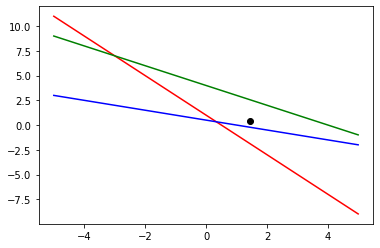

In [577]:
x = np.arange(-5,5,0.01)

y1 = 1 - (2*x)
y2 = (1/2)*(1 - x)
y3 = 4-x

plt.plot(x, y1,color='r')
plt.plot(x, y2,color='b')
plt.plot(x, y3,color='g')
plt.scatter(solucion[0],solucion[1],color='k')
plt.show()


In [578]:
#Ahora para el b se hace lo mismo solo que paso por paso
#A la matrix estrella que halle, reemplazo el x y y de los pasos y guardo la ditancia para cada uno
#la manta sale porque es un promedio de todas las posibles minimas distnacias y el punto de la curva minimo debe ser el d emi solucion
#Mx*-b=dvector y la norma es el cuadrado de la raiz



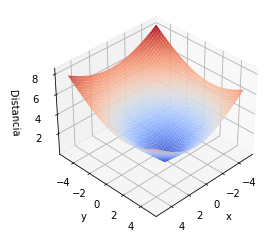

In [586]:
x_sol = solucion
distances = []

X = np.arange(-5, 5, 0.01)
Y = np.arange(-5, 5, 0.01)

for x in X:
    for y in Y:
        dist = np.sqrt((x - x_sol[0])**2 + (y - x_sol[1])**2)
        distances.append(dist)
        
#poner todo de la misma dimension
Z = np.array(distances).reshape((len(X), len(Y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia')
ax.view_init(elev=35, azim=45)
plt.show()



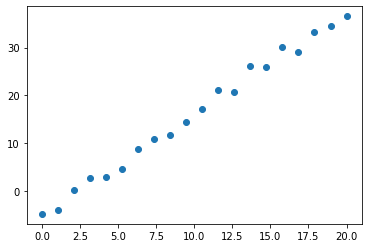

In [580]:
#7
#carga de datos
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Minimos.dat' 

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file
    
    
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

Parámetros del mejor ajuste:
theta0 = -14.77155324329739
theta1 = 16.65431243996117
theta2 = -0.019951825974866798


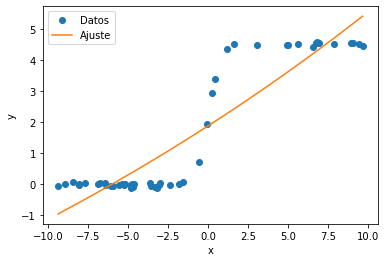

In [604]:
# Función sigmoidal
def sigmoid(x, theta):
    return theta[0] + theta[1] * np.exp(-theta[2] * x)

# Función de costo a minimizar
def cost_function(theta, x, y):
    y_pred = sigmoid(x, theta)
    return np.sum((y - y_pred)**2)


# Parámetros iniciales
theta0 = np.array([1, 1, 1])

# Ajuste de la curva mediante mínimos cuadrados
from scipy.optimize import minimize

res = minimize(cost_function, theta0, args=(x, y), method='Powell')

theta_hat = res.x

# Impresión de los parámetros del mejor ajuste
print('Parámetros del mejor ajuste:')
print('theta0 =', theta_hat[0])
print('theta1 =', theta_hat[1])
print('theta2 =', theta_hat[2])

# Gráfica de los datos y la curva ajustada
x_plot = np.linspace(np.min(x), np.max(x), 1000)
y_plot = sigmoid(x_plot, theta_hat)

plt.plot(x, y, 'o', label='Datos')
plt.plot(x_plot, y_plot, label='Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
